In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from seminartools.data import read_merged
from seminartools.models.armax_model import ARMAXModel


# 1. read data

In [5]:
df = read_merged().reset_index()
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


# 2. get coefficients of ARMA

In [6]:
modelARMA = ARMAXModel()


In [7]:
from warnings import filterwarnings

filterwarnings('ignore')
modelARMA.fit(df)

In [8]:
ma = list(modelARMA.models["Netherlands"].polynomial_ma)[1:]
ar = list(modelARMA.models["Netherlands"].polynomial_ar)[1:]

In [9]:
import pandas as pd
countryA = "Netherlands"
countryB = "Belgium"

countries = (df["country"].unique())

dfs = pd.DataFrame()
for country in countries:
    ma = list(modelARMA.models[country].polynomial_ma)
    ar = list(modelARMA.models[country].polynomial_ar)

    #for if P and/or Q are 0
    ma.append(0)
    ar.append(0)
    

    frame = pd.DataFrame({'MA1': ma[1], 'AR1': ar[1]}, index = [country])
    dfs = pd.concat([dfs,frame], axis = 0)

dfs = dfs.rename_axis('country')
dfs


,MA1,AR1
country,,
Japan,0.291001,0.046522
Canada,-0.514602,-0.932587
United States,-0.257006,-0.858605
Australia,-0.656444,-0.953244
New Zealand,-0.407966,-0.747072
Switzerland,0.434300,0.180229
Italy,-0.364184,-0.688311
France,1.213644,0.749597
Portugal,0.909473,0.527851


# 3. Plot AR1 coefficient of ARMA model

In [10]:
import geopandas as gpd


In [11]:
# get world and europe map/data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns = {'name': 'country'})
europe = world[(world.continent == 'Europe')]



In [12]:
#merge world data and our values
world_merged = world.merge(dfs, how='left', left_on='country', right_on = 'country')
world_merged

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,MA1,AR1
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",-0.514602,-0.932587
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN


<Axes: >

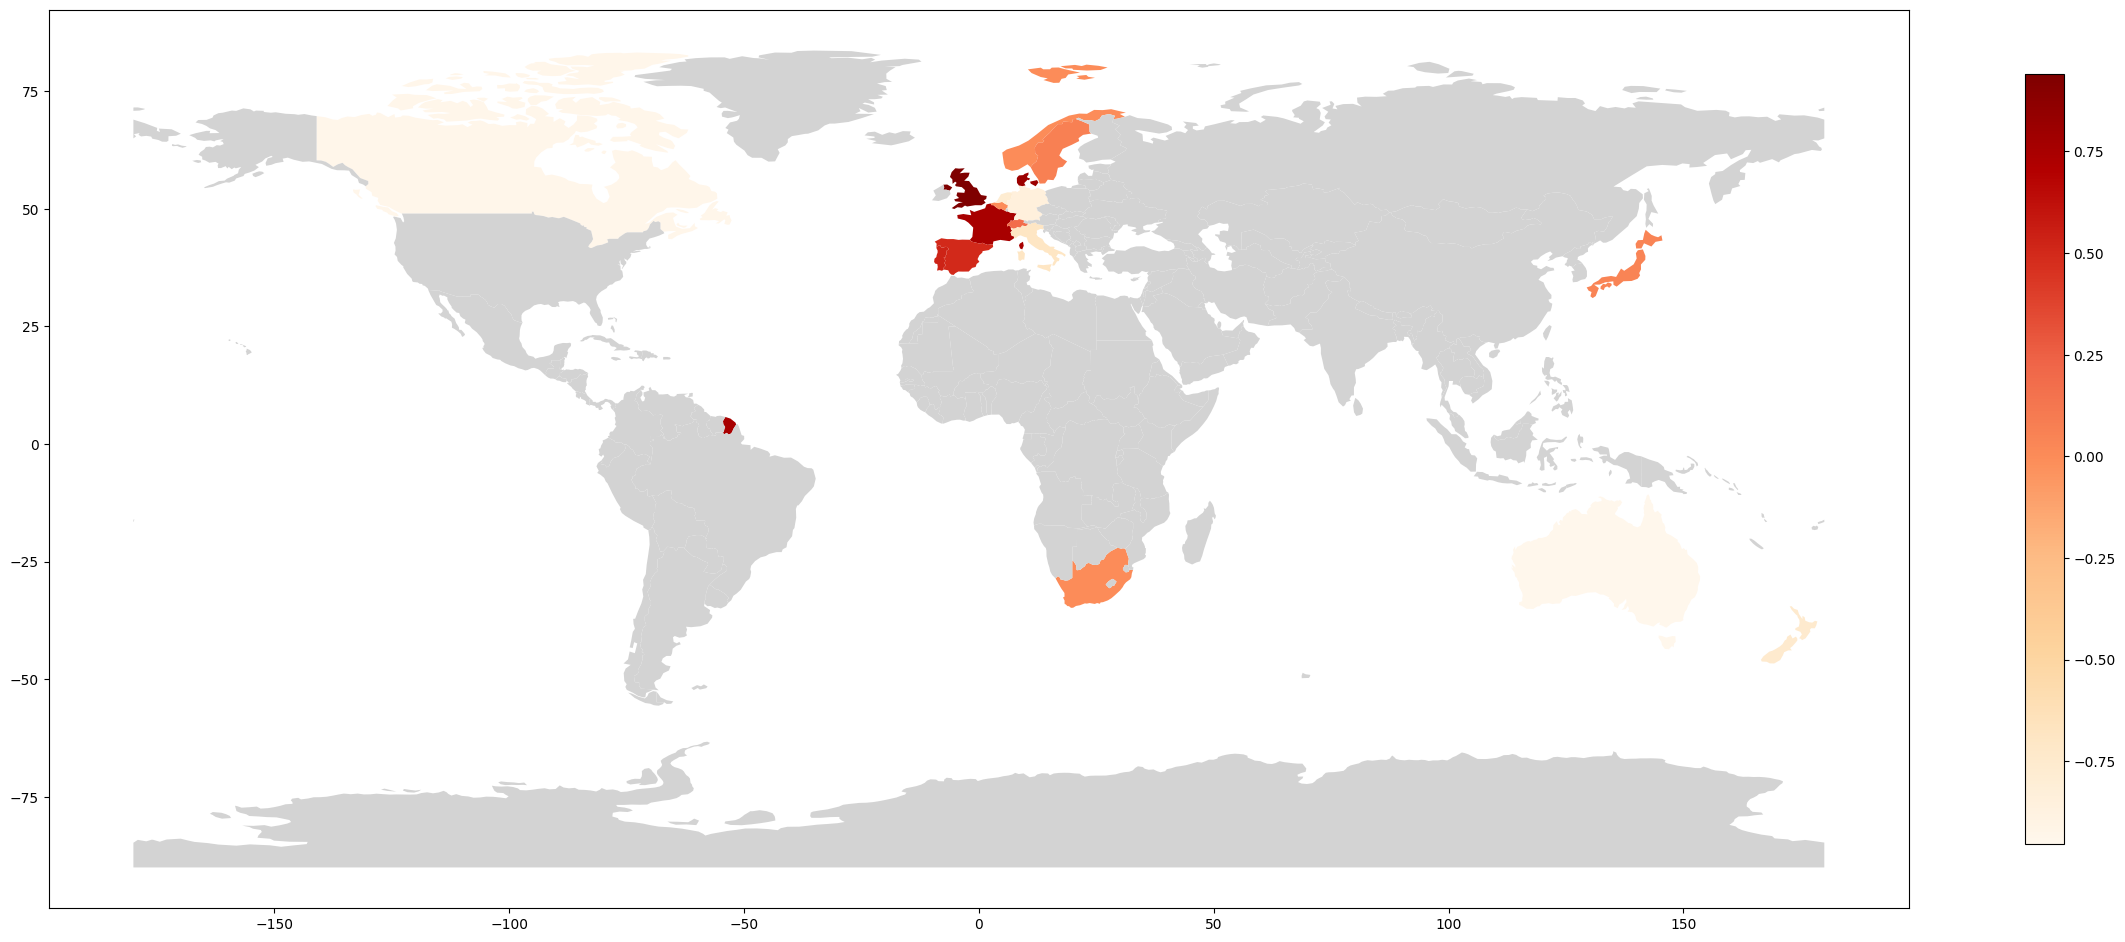

In [13]:
#plot it 
world_merged.plot(column='AR1', cmap='OrRd', legend=True, legend_kwds={"shrink":.5},figsize=(30, 20), missing_kwds= dict(color = "lightgrey",))



In [167]:
#Drop Russia from europe data cause it looks ugly cause looks ugly
europe = europe[europe['country'] != 'Russia']


<Axes: >

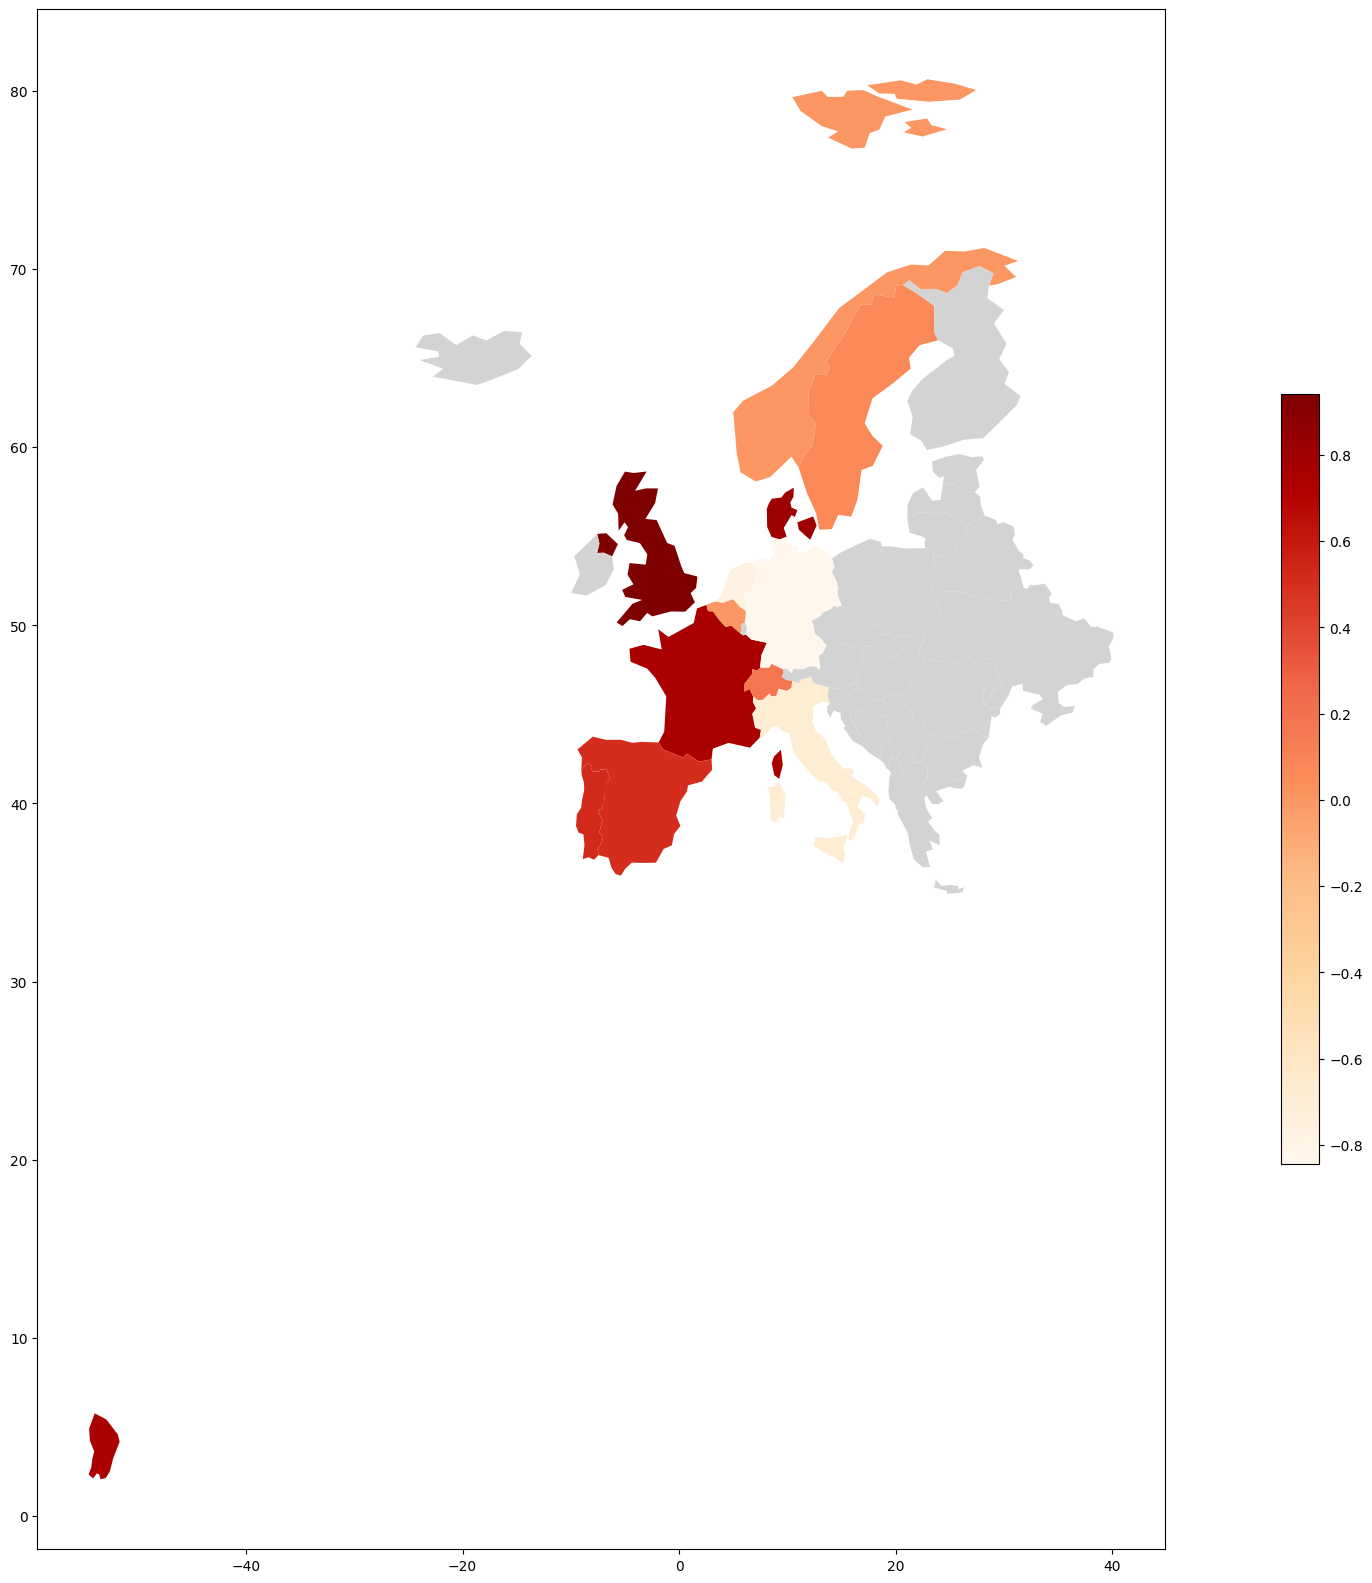

In [168]:
europe_merged = europe.merge(dfs, how='left', left_on='country', right_on = 'country')
europe_merged.plot(column='AR1', cmap='OrRd', legend=True, legend_kwds={"shrink":.5},figsize=(30, 20), missing_kwds= dict(color = "lightgrey",))


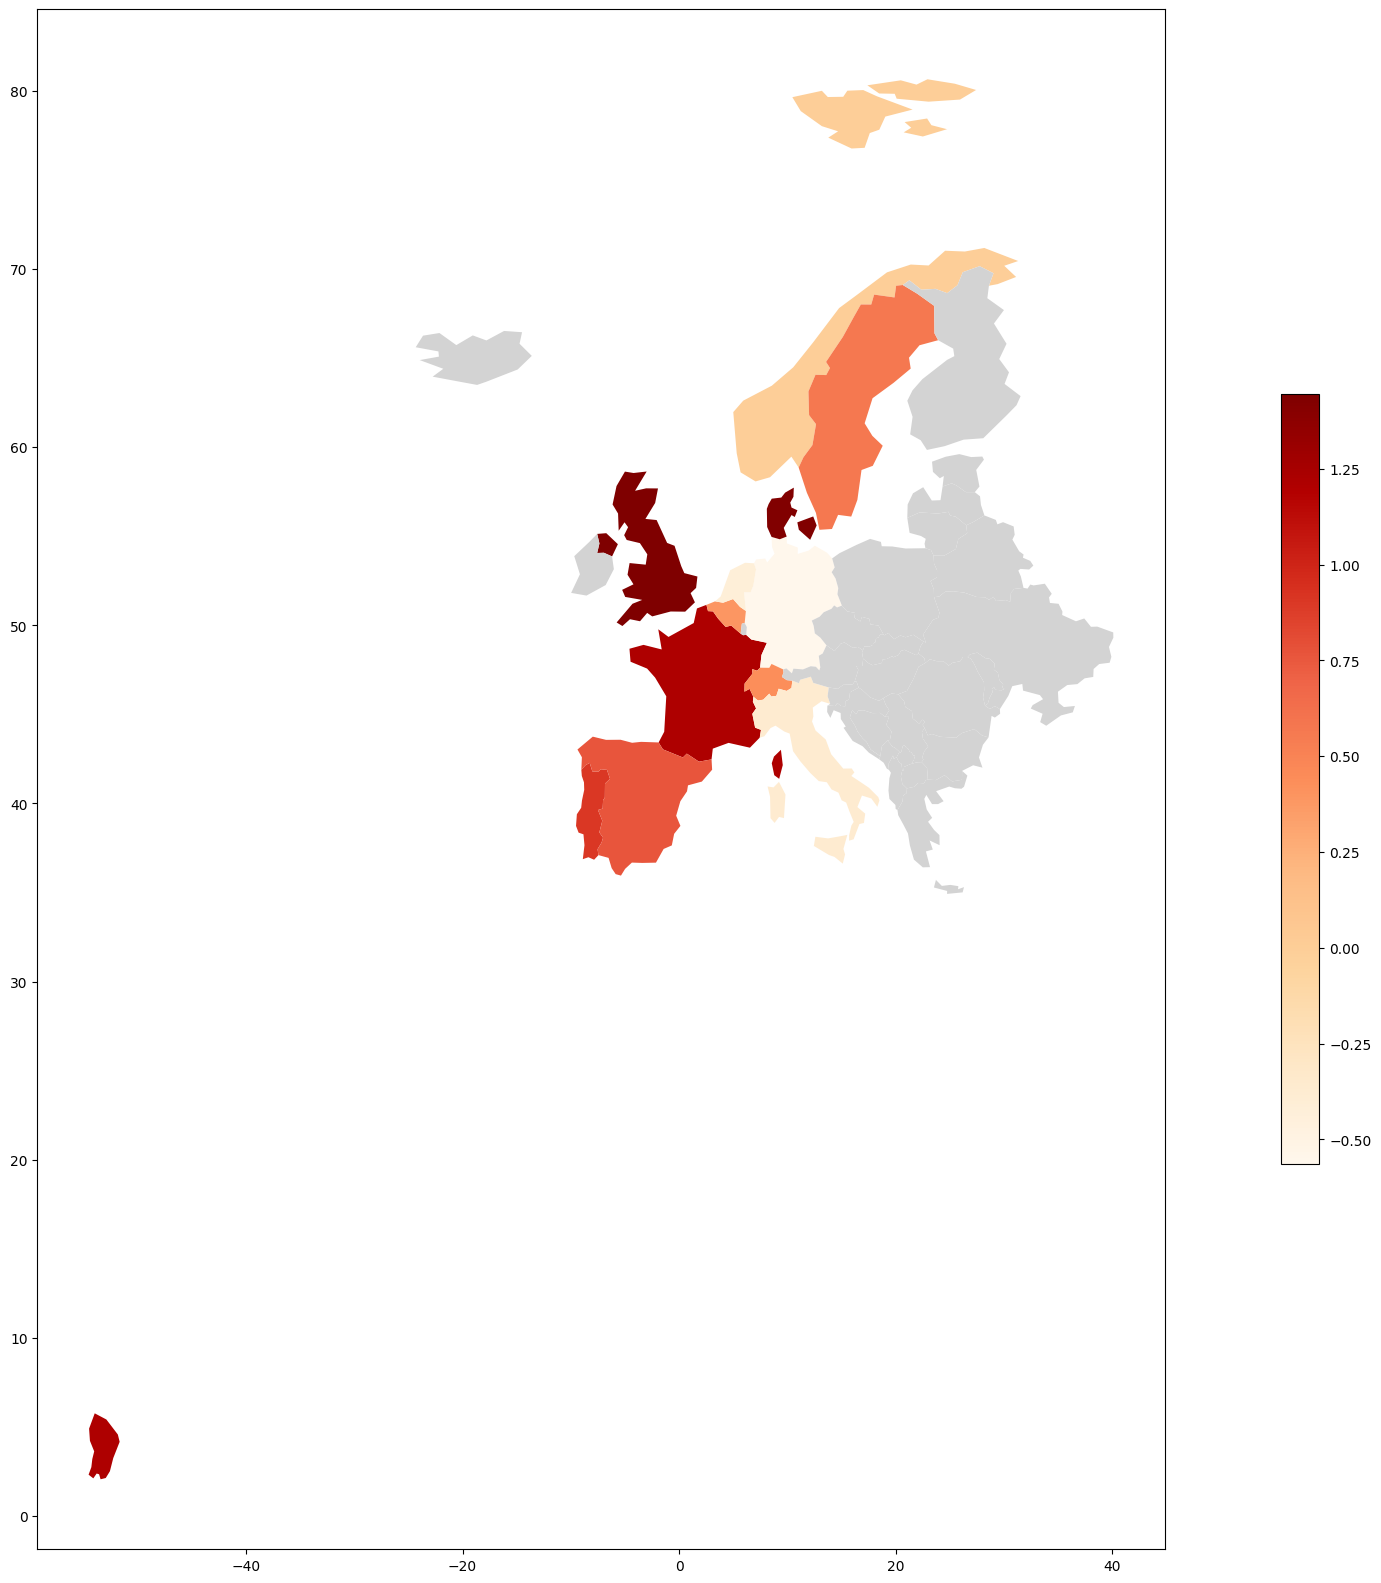

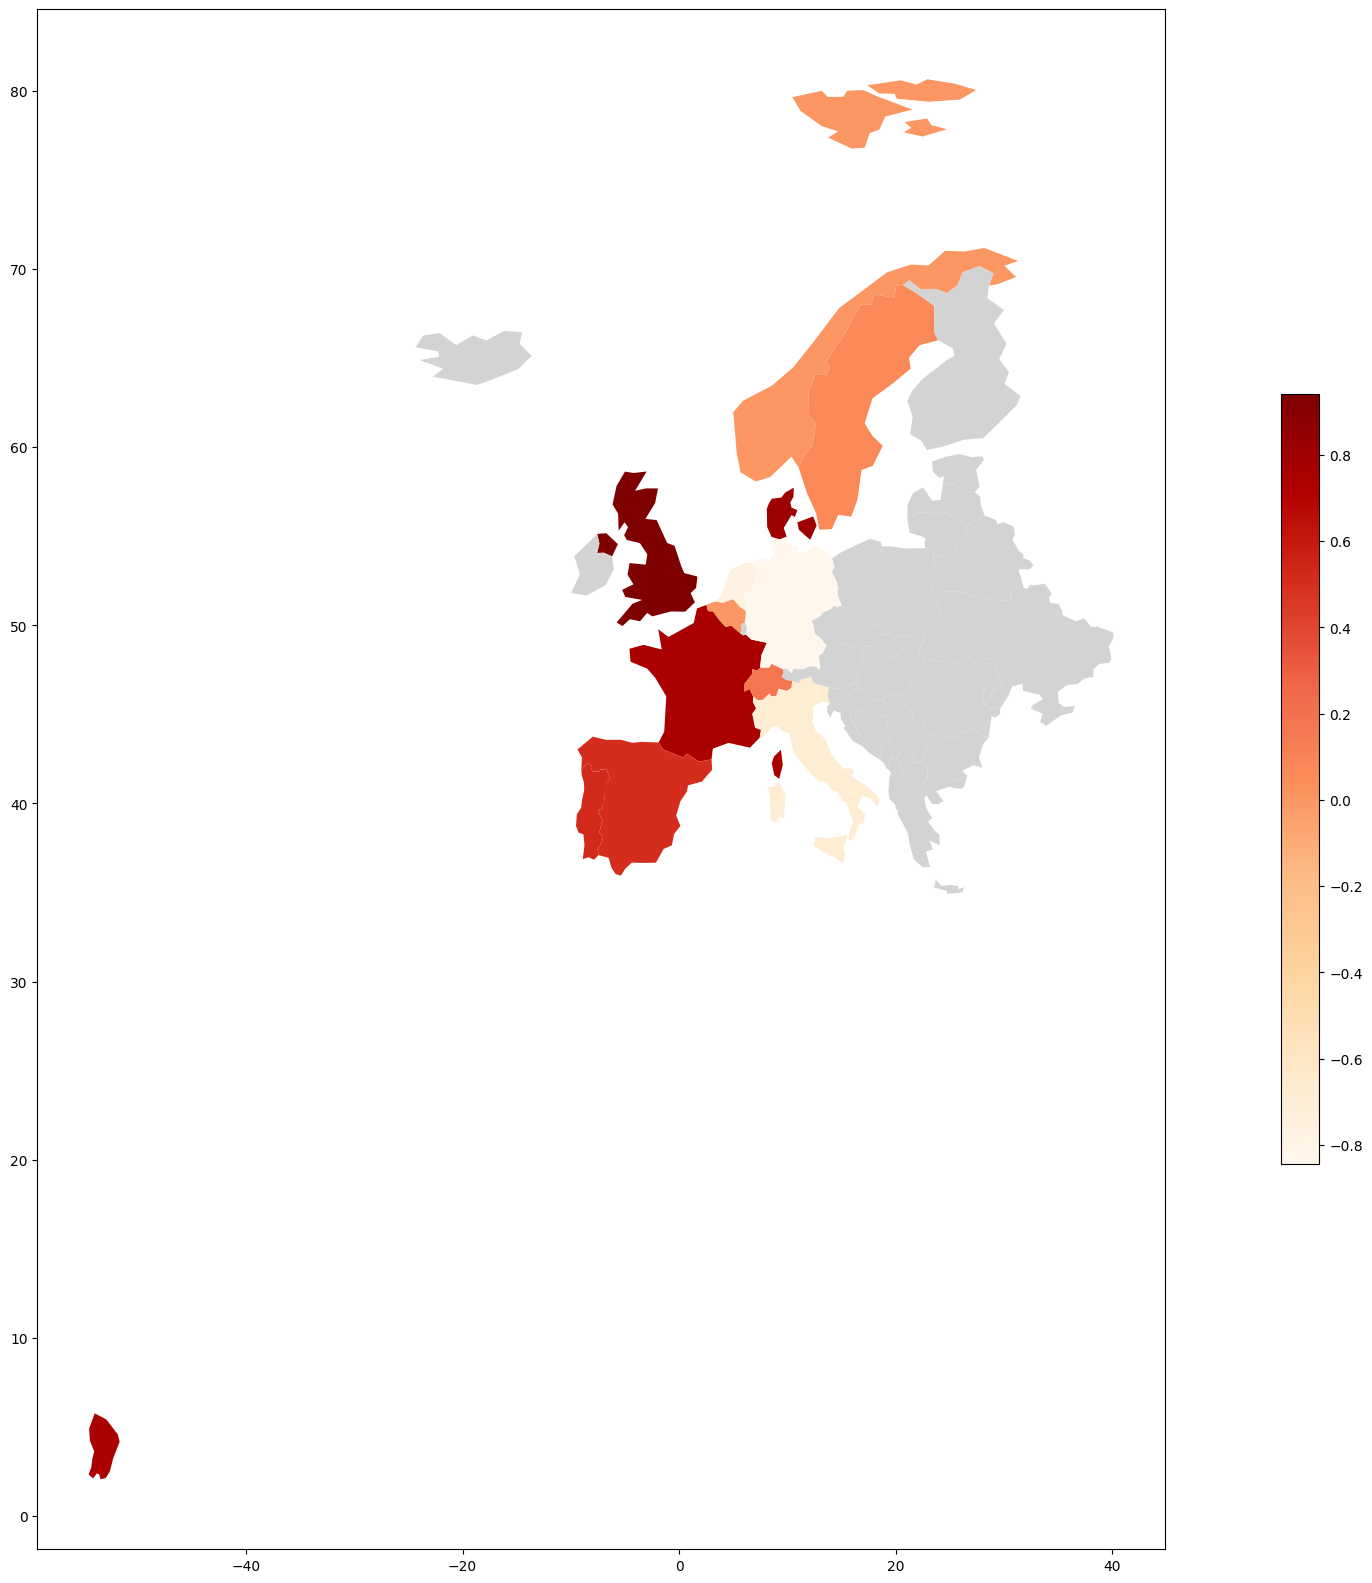

In [16]:
from seminartools.utils import get_plot

plot1, plot2 = get_plot(dfs, coefficient_name = ['MA1', 'AR1'], europe = True, legend = True)
